### Donor Neural Network Model

**Predicitng the Number of Donors** 

**I want to analyze  various features to determine their impact on donor numbers** 

By developing a nueral network model to predict donation amounts based on a variety of features we can leverage different regression techniques and understand the factors that influence donor behavior and improve our predictive accuracy.###



In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

import warnings

#### The Data

The dataset contains information on organizatinal, national, and state level data and the corresponding donor values. For more info, see the readme file

In [13]:
file_path = r'C:\Users\ibaca\DonorByMonth.csv'
df = pd.read_csv(file_path)

In [14]:
df.head()

,Date,Donors,AvgTemp,CPI,Budget,Sales,NewResidentialConstruction(Thousands),HousingUnitPermits(Thousands),HousingUnits,Adjusted Sales,AverageContrusctionHoursWorked,NewHomeSales(Thousands),NewHomeSales,AdjustedDonors
0,1/1/2019,34698,35.9,251.712,1292132,1557361,"1,261",87.0,87000,1557361,39.7,49,49000,34698
1,2/1/2019,27533,39.9,252.776,1271468,1432247,"1,287",80.0,80000,1432247,38.6,57,57000,27533
2,3/1/2019,36468,50.2,254.202,1421717,1667795,"1,305",98.2,98200,1667795,39.3,68,68000,36468
3,4/1/2019,32788,57.4,255.548,1348579,1530041,"1,311",116.6,116600,1530041,39.0,64,64000,32788
4,5/1/2019,39674,61.6,256.092,1336206,1589136,"1,347",118.1,118100,1589136,39.1,56,56000,39674


In [15]:
df = df.drop(columns=['Date'])
df.head()

,Donors,AvgTemp,CPI,Budget,Sales,NewResidentialConstruction(Thousands),HousingUnitPermits(Thousands),HousingUnits,Adjusted Sales,AverageContrusctionHoursWorked,NewHomeSales(Thousands),NewHomeSales,AdjustedDonors
0,34698,35.9,251.712,1292132,1557361,"1,261",87.0,87000,1557361,39.7,49,49000,34698
1,27533,39.9,252.776,1271468,1432247,"1,287",80.0,80000,1432247,38.6,57,57000,27533
2,36468,50.2,254.202,1421717,1667795,"1,305",98.2,98200,1667795,39.3,68,68000,36468
3,32788,57.4,255.548,1348579,1530041,"1,311",116.6,116600,1530041,39.0,64,64000,32788
4,39674,61.6,256.092,1336206,1589136,"1,347",118.1,118100,1589136,39.1,56,56000,39674


In [16]:
##Supress "FutureWarnings"
warnings.filterwarnings("ignore", category=FutureWarning)

#Remove  the comma in the dataframe
df['NewResidentialConstruction(Thousands)'] = df['NewResidentialConstruction(Thousands)'].str.replace(',', '').astype(float)

#Shuffle the dataset because it as originally chronilogical

df = shuffle(df)

#Split dataset into training and dev sets
training_set, dev_set = np.split(df,[40])




In [17]:
#Identifying the features and targets of the train and dev sets

training_features = training_set.iloc[:, :-1]
training_target = training_set["AdjustedDonors"]

dev_features = dev_set.iloc[:, :-1]
dev_target = dev_set["AdjustedDonors"]



In [20]:
##First define the Neural Network
donor_model = tf.keras.Sequential([
    layers.Dense(12, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(12, activation="relu"),
    layers.Dense(12, activation="relu"),
    layers.Dense(1, activation=None),
])

##Complie the Network
donor_model.compile(optimizer="rmsprop",
                    loss="mse", metrics=["mae"])
##Train the NN Model
donor_model_history= donor_model.fit(training_features, training_target,
    epochs = 500, verbose = 0,
    validation_data= (dev_features, dev_target))                                 
    

In [25]:
mse, mae = donor_model.evaluate(dev_features, dev_target, verbose=0)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 17706044.0
Mean Absolute Error: 3367.350830078125


## For a quick and easy visual explanation visit
https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=20&networkShape=4,2&seed=0.37074&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

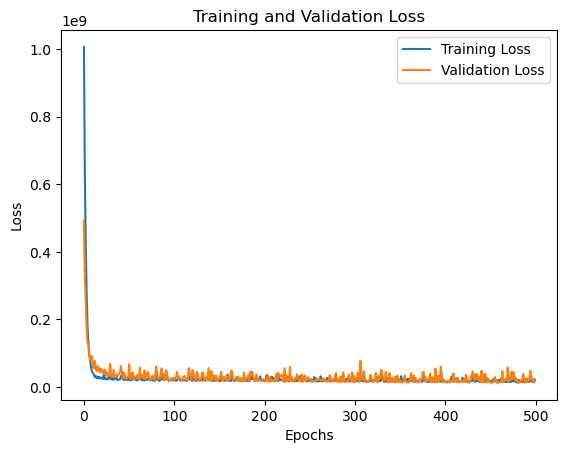

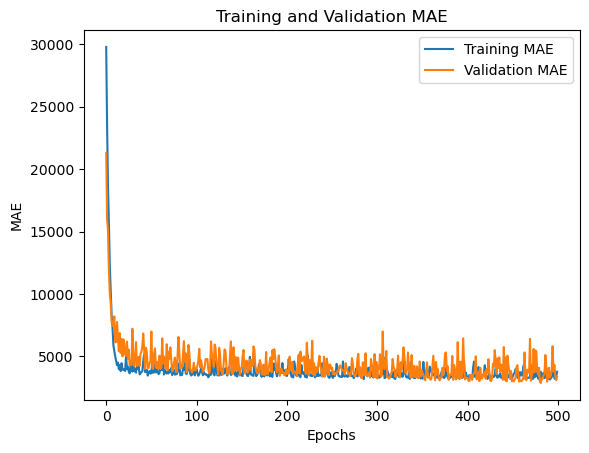

In [21]:
##Visualizze the output
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(donor_model_history.history['loss'], label='Training Loss')
plt.plot(donor_model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation MAE
plt.plot(donor_model_history.history['mae'], label='Training MAE')
plt.plot(donor_model_history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

## Note:
Loss is a general term for the error measure used during training, while MAE is a specific type of loss that gives you an average of how far off your predictions are from the actual values. Both are used to evaluate and improve your model’s performance

#### Comparing to `LinearRegression`

Compare the performance of the model in terms of mean squared error with that of a `LinearRegression` model on the full dataset `X`, `y`. Assign your result to the variable `lr`.

Finally, use the function `mean_squared_error` with arguments equal to `y` and `lr.predict(X)` to compute your error. Assign the result to the variable `lr_mse`.

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:

lr = LinearRegression().fit(training_features, training_target)
lr_mse = mean_squared_error(training_target, lr.predict(training_features))
### END SOLUTION

### ANSWER CHECK
print(lr_mse)

4197478.271016857


In [17]:
### BEGIN HIDDEN TESTS
lr_ = LinearRegression().fit(X, y)
lr_mse_ = mean_squared_error(y, lr_.predict(X))
#
#
#
assert lr_mse == lr_mse_
### END HIDDEN TESTS